# Importing Relevant Libraries

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Importing Dataset

In [4]:
df = pd.read_csv('spam_ham_dataset.csv')

# Preprocessing

In [6]:
df.head(15)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


In [7]:
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [9]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [10]:
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'^\s|\s$', '', text)
    text = text.lower()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['cleaned_text'] = df['text'].apply(preprocess_text)
print(df['cleaned_text'].head())

0    subject enron methanol meter 988291 follow not...
1    subject hpl nom january 9 2001 see attached fi...
2    subject neon retreat ho ho ho around wonderful...
3    subject photoshop window office cheap main tre...
4    subject indian spring deal book teco pvr reven...
Name: cleaned_text, dtype: object


In [11]:
df

,Unnamed: 0,label,text,label_num,cleaned_text
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,subject enron methanol meter 988291 follow not...
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,subject hpl nom january 9 2001 see attached fi...
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,subject neon retreat ho ho ho around wonderful...
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,subject photoshop window office cheap main tre...
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,subject indian spring deal book teco pvr reven...
...,...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0,subject put 10 ft transport volume decreased 2...
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,subject 3 4 2000 following noms hpl take extra...
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0,subject calpine daily gas nomination julie men...
5169,1409,ham,Subject: industrial worksheets for august 2000...,0,subject industrial worksheet august 2000 activ...


In [12]:
df = df.drop(columns = ['text','Unnamed: 0'])

In [13]:
df

,label,label_num,cleaned_text
0,ham,0,subject enron methanol meter 988291 follow not...
1,ham,0,subject hpl nom january 9 2001 see attached fi...
2,ham,0,subject neon retreat ho ho ho around wonderful...
3,spam,1,subject photoshop window office cheap main tre...
4,ham,0,subject indian spring deal book teco pvr reven...
...,...,...,...
5166,ham,0,subject put 10 ft transport volume decreased 2...
5167,ham,0,subject 3 4 2000 following noms hpl take extra...
5168,ham,0,subject calpine daily gas nomination julie men...
5169,ham,0,subject industrial worksheet august 2000 activ...


# Feature Selection

In [15]:
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['label_num']

# Training, Testing and Prediction

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print('Naive Bayes Accuracy:', accuracy_score(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.9432989690721649
[[1060   61]
 [  27  404]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1121
           1       0.87      0.94      0.90       431

    accuracy                           0.94      1552
   macro avg       0.92      0.94      0.93      1552
weighted avg       0.95      0.94      0.94      1552



In [19]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9510309278350515
[[1083   38]
 [  38  393]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1121
           1       0.91      0.91      0.91       431

    accuracy                           0.95      1552
   macro avg       0.94      0.94      0.94      1552
weighted avg       0.95      0.95      0.95      1552



# Confusion Matrix for Naive Bayes

In [21]:
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
conf_matrix_df = pd.DataFrame(conf_matrix_nb, index=['Actual Ham', 'Actual Spam'], columns=['Predicted Ham', 'Predicted Spam'])
print('Confusion Matrix for Naive Bayes:')
print(conf_matrix_df)

Confusion Matrix for Naive Bayes:
             Predicted Ham  Predicted Spam
Actual Ham            1060              61
Actual Spam             27             404


# Confusion Matrix for Decision Tree

In [23]:
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
conf_matrix_dt_df = pd.DataFrame(conf_matrix_dt, index=['Actual Ham', 'Actual Spam'], columns=['Predicted Ham', 'Predicted Spam'])
print('Confusion Matrix for Decision Tree:')
print(conf_matrix_dt_df)

Confusion Matrix for Decision Tree:
             Predicted Ham  Predicted Spam
Actual Ham            1083              38
Actual Spam             38             393


# Accuracy Score of Models

In [25]:
print('Naive Bayes Accuracy:', accuracy_score(y_test, y_pred_nb))
print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred_dt))

Naive Bayes Accuracy: 0.9432989690721649
Decision Tree Accuracy: 0.9510309278350515


In [26]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'Decision Tree'],
    'Accuracy': [accuracy_nb, accuracy_dt]
})

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

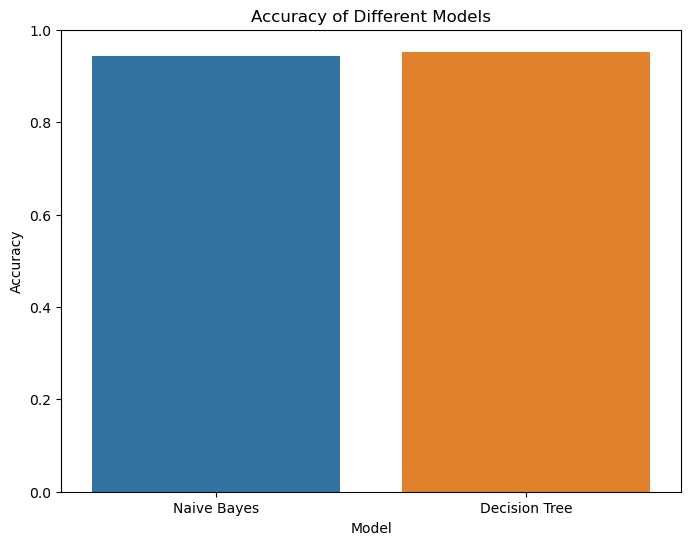

In [28]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df)
plt.title('Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()